In [1]:
from IPython.display import display, HTML 
display(HTML("""
<style>
div.container{width:86% !important;}
div.cell.code_cell.rendered{width:100%;}
div.CodeMirror {font-family:Consolas; font-size:15pt;}
div.output {font-size:15pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:15pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:15px;}
</style>
 """))

In [63]:
# import 
import seaborn as sns # iris data
import pandas as pd   # 원핫인코딩
import numpy as np
from sklearn.preprocessing import LabelEncoder        # 라벨인코딩(문자->숫자)
from tensorflow.keras.utils import to_categorical     # 원핫인코딩  (라벨인코딩)
from sklearn.model_selection import train_test_split  # 데이터 분할(층화추출로 분할)
from tensorflow.keras.models import Sequential,load_model,save_model
from tensorflow.keras.layers import Dense,Input, add, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt                       # 학습과정 시각화

- iris data
1. sepal_length : 꽃받침길이
2. sepal_width : 꽃받침넓이
3. petal_length : 꽃잎길이
4. petal_width : 꽃잎넓이
5. species : 종(세토사,버즈칼라,버즈니카) setosa, versicolor, virginica

to_categorical :딥러닝(tensorflow.keras)
get_dummies : 머신러닝

In [15]:
# 문자 변수의 운핫인코딩 방법1 : labelEncoder를 통해 species를 숫자로 변환하여 to_categorical
iris = sns.load_dataset('iris')
# iris.head(2)
# iris['species'] # 문자  # to_categofical을 쓰려면 int(숫자)로 바꿔야 함 
labelEncoder = LabelEncoder()  # 라벨인코더 객체 생성
# labelEncoder.fit(iris['species']) # 숫자로 바꾸게 학습시키고
# iris['y'] = labelEncoder.transform(iris['species']) # 학습한걸 y컬럼에 추가하기 
# iris  # 숫자로 바꾼 후 to_categorical 사용해야 함.
iris['y'] = labelEncoder.fit_transform(iris.species)
# iris.iloc[::25]
to_categorical(iris['y'])[::25]  # to_categorical의 결과는 numpy배열

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [20]:
# 문자 변수의 운핫인코딩 방법2 :
iris = sns.load_dataset('iris')
pd.get_dummies(iris.species).values 
pd.get_dummies(iris.species).to_numpy()[::25]   # pd.get_dummies 결과는 데이터 프레임 
# 머신러닝 하려면 numpy배열로 바꿔야 함 .values / .to_numpy() 해야함  

array([[1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1]], dtype=uint8)

In [50]:
# 1. 데이터 생성 및 전처리
iris = sns.load_dataset('iris')
# iris.info() 결측치 있으면 결측치 처리 진행 필수
# iris['species'].value_counts()  타겟변수의 분포 확인 (골고루 분포되었는지?)
# 입력(독립)변수와 타겟(종속)변수 분리
iris_X = iris.iloc[:,:-1].to_numpy() # 넘파이 배열로 넣어야 스케일 조정도 잘 됨.
# iris_X[:3]
iris_y = iris.iloc[:,-1]
iris_y 
iris_Y = pd.get_dummies(iris_y).values
# iris_Y[::50]
# 훈련셋(8) : 테스트 셋(2)
X_train, X_test, Y_train, Y_test = train_test_split(iris_X,iris_Y,
                                                   #train_size=0.8,    # 훈련셋 비율 80%
                                                   test_size=0.2,    # 테스트셋 비율 20%
                                                   stratify=iris_Y,  # 층화추출
                                                   random_state=7    # 랜덤시드값
                                                   )
print(iris_X.shape, iris_Y.shape)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(150, 4) (150, 3)
(120, 4) (30, 4) (120, 3) (30, 3)


In [51]:
# 층화추출이 되었는지 확인하는 방법 
# iris_Y.argmax(axis=1)
print(pd.Series(np.argmax(iris_Y,axis=1)).value_counts())
print(pd.Series(np.argmax(Y_train, axis=1)).value_counts())
print(pd.Series(np.argmax(Y_test, axis=1)).value_counts())

0    50
1    50
2    50
dtype: int64
0    40
2    40
1    40
dtype: int64
0    10
2    10
1    10
dtype: int64


In [68]:
# 2. 모델 구성(입력4, 출력3)
model = Sequential()
model.add(Dense(units=64, input_dim=4, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=50, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=30, activation='relu'))
model.add(Dense(units=3, activation='softmax')) # 출력층
model.summary() # 파라미터 구성 확인

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 64)                320       
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_26 (Dense)            (None, 128)               8320      
                                                                 
 dense_27 (Dense)            (None, 50)                6450      
                                                                 
 dropout_3 (Dropout)         (None, 50)                0         
                                                                 
 dense_28 (Dense)            (None, 30)                1530      
                                                                 
 dense_29 (Dense)            (None, 3)                

In [69]:
# 3. 학습과정 설정
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [70]:
# 4. 학습 : epoch마다 val_accuracy값이 좋아지고 있으면 model 자동 저장 (콜백추가)
    # 모델이 자동으로 저장이 될 경로 ./model_iris/iris-epoch{100}-val{0.8745}.h5
import os
model_save_folder = './model_iris/'
if not os.path.exists(model_save_folder): # model_save_folder 가 없는지? 없으면 폴더 생성 
    os.mkdir(model_save_folder)
file = model_save_folder + 'iris-epoch{epoch:03d}-val{val_accuracy:.4f}.h5'

# 모델 자동저장할 콜백 객체

checkpoint = ModelCheckpoint(filepath=file,
                            monitor='val_accuracy', # 모니터링할 지표 / 기본값:val_loss
                            mode='max',
                            save_best_only=True,    # False : 매번 저장
                            verbose=1)              # 모델 저장시 로그 출력 (0:로그 출력안함)
# 조기 종료 콜백 객체 
earlyStopping = EarlyStopping(patience=40)          # monitor 기본값은 val_loss , val_loss가 떨어지지않고 올라가거나 계속 같은 값이면 40번은 봐줌
hist = model.fit(X_train, Y_train,
#                 batch_size=40,                    # 한번에 읽어들이는 것
                epochs=500,
                validation_split=0.2,               # 훈련셋의 20%를 검증셋
                callbacks=[earlyStopping,checkpoint])

Epoch 1/500
1/3 [=========>....................] - ETA: 0s - loss: 1.2516 - accuracy: 0.2500
Epoch 1: val_accuracy improved from -inf to 0.37500, saving model to ./model_iris\iris-epoch001-val0.3750.h5
3/3 [==============================] - 1s 94ms/step - loss: 1.1742 - accuracy: 0.3646 - val_loss: 1.0420 - val_accuracy: 0.3750
Epoch 2/500
1/3 [=========>....................] - ETA: 0s - loss: 1.0899 - accuracy: 0.4688
Epoch 2: val_accuracy improved from 0.37500 to 0.66667, saving model to ./model_iris\iris-epoch002-val0.6667.h5
3/3 [==============================] - 0s 29ms/step - loss: 1.0764 - accuracy: 0.4896 - val_loss: 0.9981 - val_accuracy: 0.6667
Epoch 3/500
1/3 [=========>....................] - ETA: 0s - loss: 1.0191 - accuracy: 0.6562
Epoch 3: val_accuracy did not improve from 0.66667
3/3 [==============================] - 0s 17ms/step - loss: 0.9996 - accuracy: 0.6042 - val_loss: 0.9556 - val_accuracy: 0.6667
Epoch 4/500
1/3 [=========>....................] - ETA: 0s - loss

Epoch 30/500
1/3 [=========>....................] - ETA: 0s - loss: 0.2034 - accuracy: 0.9375
Epoch 30: val_accuracy did not improve from 0.95833
3/3 [==============================] - 0s 18ms/step - loss: 0.2534 - accuracy: 0.8646 - val_loss: 0.1779 - val_accuracy: 0.9583
Epoch 31/500
1/3 [=========>....................] - ETA: 0s - loss: 0.3007 - accuracy: 0.8438
Epoch 31: val_accuracy did not improve from 0.95833
3/3 [==============================] - 0s 16ms/step - loss: 0.2069 - accuracy: 0.9167 - val_loss: 0.2909 - val_accuracy: 0.8333
Epoch 32/500
1/3 [=========>....................] - ETA: 0s - loss: 0.1261 - accuracy: 0.9688
Epoch 32: val_accuracy did not improve from 0.95833
3/3 [==============================] - 0s 16ms/step - loss: 0.2106 - accuracy: 0.9375 - val_loss: 0.1997 - val_accuracy: 0.9583
Epoch 33/500
1/3 [=========>....................] - ETA: 0s - loss: 0.2463 - accuracy: 0.9375
Epoch 33: val_accuracy did not improve from 0.95833
3/3 [===========================

Epoch 60/500
1/3 [=========>....................] - ETA: 0s - loss: 0.1158 - accuracy: 0.9062
Epoch 60: val_accuracy did not improve from 0.95833
3/3 [==============================] - 0s 17ms/step - loss: 0.0868 - accuracy: 0.9479 - val_loss: 0.2665 - val_accuracy: 0.9167
Epoch 61/500
1/3 [=========>....................] - ETA: 0s - loss: 0.2978 - accuracy: 0.8750
Epoch 61: val_accuracy did not improve from 0.95833
3/3 [==============================] - 0s 16ms/step - loss: 0.1750 - accuracy: 0.9271 - val_loss: 0.2246 - val_accuracy: 0.9583
Epoch 62/500
1/3 [=========>....................] - ETA: 0s - loss: 0.0567 - accuracy: 1.0000
Epoch 62: val_accuracy did not improve from 0.95833
3/3 [==============================] - 0s 18ms/step - loss: 0.0767 - accuracy: 0.9792 - val_loss: 0.1617 - val_accuracy: 0.9583
Epoch 63/500
1/3 [=========>....................] - ETA: 0s - loss: 0.0756 - accuracy: 0.9688
Epoch 63: val_accuracy did not improve from 0.95833
3/3 [===========================

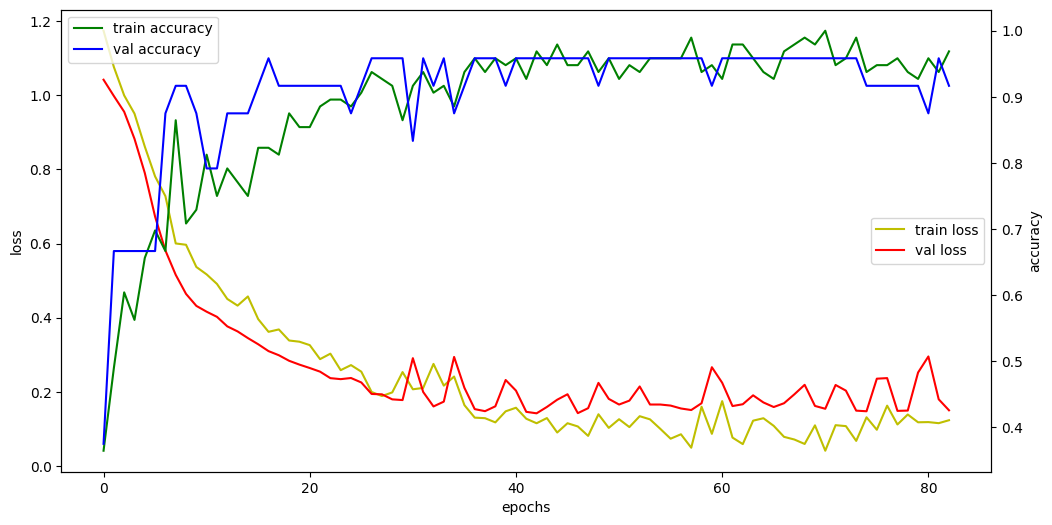

In [71]:
# 모델 학습과정 시각화 
fig, loss_ax = plt.subplots(figsize=(12,6))
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['accuracy'], 'g', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'b', label='val accuracy')
loss_ax.set_xlabel('epochs')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='center right')
acc_ax.legend(loc='upper left')
plt.show()

In [91]:
# 6. 모델평가(evaluate,교차, recall, precision:y 실제값,y 예측값)
# iris-epoch034-val0.9583.h5도 같이 평가 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score, precision_score, f1_score
# 학습된 모델
loss, acc = model.evaluate(X_test, Y_test)
loss, acc
# 현재 모델의 recall과 precision을 위해서 실제값과 예측값 계산
real = np.argmax(Y_test, axis=1) # 실제값
pred = np.argmax(model.predict(X_test), axis=1) # 예측값
recall_s = recall_score(real, pred, average='weighted') # average='weighted':다중분류
precision = precision_score(real, pred, average='weighted')
f1 = f1_score(real,pred, average='weighted')
print('model loss :', loss)
print('model accuracy :', acc)
print('model recall :', recall_s)
print('model precision :', precision)
print('model f1 score :', f1)
# 저장된 모델의 평가 
# model2 = load_model('model_iris/iris-epoch034-val0.9583.h5')
# loss,acc = model2.evaluate(X_test,Y_test)
# pred = model2.predict(X_test).argmax(axis=1)
# recall = recall_score(real, pred, average='weighted')
# precision = precision_score(real, pred, average='weighted')
# f1 = f1_score(real, pred, average='weighted')
# print('model2 loss :', loss)
# print('model2 acc :', acc)
# print('model2 recall :', recall)
# print('model2 precision :', precision)
# print('model2 f1 score :', f1)

1/1 [==============================] - 0s 20ms/step
model loss : 0.039039723575115204
model accuracy : 1.0
model recall : 1.0
model precision : 1.0
model f1 score : 1.0


In [92]:
# 교차표
pred = np.argmax(model.predict(X_test,verbose=0), axis=1)
pd.crosstab(real,pred,
           rownames=['real'], colnames=['pred'])

pred,0,1,2
real,,,
0,10,0,0
1,0,10,0
2,0,0,10


In [93]:
confusion_matrix(real, pred)

array([[10,  0,  0],
       [ 0, 10,  0],
       [ 0,  0, 10]], dtype=int64)

In [ ]:
# 모델 저장 및 사용
save_model(model, 'model_iris/iris.h5')
model.save('model_iris/iris.h5') # tensorflow 2.18이상일 경우 확장자를 .keras로도 사용할 수 있음

In [97]:
# 모델 예측하기
# iris.loc[100] (6.3,3.3,6.0,2.5) 예측하기
result = model.predict([[6.3, 3.3, 6.0, 2.5]])
np.argmax(result) # 예측값 (virginica로 예측)

1/1 [==============================] - 0s 42ms/step


2